In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mizimamizimao","key":"ad69763dd86d264c690e18302c1296d1"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # chmod600 현재사용자만 파일권한부여 명령

In [ ]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## 간단한 합성곱 만들기
- 합성곱 층과 MaxPooling 층을 연달아서 쌓아 올림

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1)) # 입력층 만듬

# 합성곱 층, filters=32 깊이
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs) # 함수형 API
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x) #
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x) #

# 출력층
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

## MNIST 이미지 합성곱 훈련
- 2장의 연결 네트워크는 97.8%

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 9s 6ms/step - loss: 0.1656 - accuracy: 0.9480
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0460 - accuracy: 0.9857
Epoch 3/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0320 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0171 - accuracy: 0.9945


In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0298 - accuracy: 0.9905
0.9904999732971191


## p.292
- 최대 풀링 층이 빠진 잘못된 구조의 합성곱
  + 가장 큰 문제점 : 이미지 압축이 안

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

## 개와 고양이 이미지 다운로

In [5]:
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:27<00:00, 33.1MB/s]
100% 812M/812M [00:27<00:00, 30.9MB/s]


In [6]:
!unzip -qq dogs-vs-cats.zip
!unzip -qq train.zip

In [7]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

## 모델 만들기

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))  # 180 x 180 크기의 RGB를 기대한다
x = layers.Rescaling(1. / 255)(inputs)  # 입력을 255로 나누어 [0, 1] 범위 스케일 조정

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

## 데이터 전처리
- p,301

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

new_base_dir = pathlib.Path("cats_vs_dogs_small")

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180,180),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180,180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180,180),
    batch_size=32
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


## 텐서플로 Dataset 객체 이해하기
- 샘플 데이터 1000개 만들기

In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

- 하나의 샘플 확인하기

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


- 데이터 배치

In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


- 원소 크기를 (16,) ->(4,4)

In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


### Dataset이 반환하는 데이터 및 레이블 크기 확인

In [ ]:
for data_batch, labels_batch in train_dataset:
  print("데이터 배치 크기:", data_batch.shape)
  print("레이블 배치 크기:", labels_batch.shape)
  break

데이터 배치 크기: (32, 180, 180, 3)
레이블 배치 크기: (32,)


### 모델 훈련하기

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convent_from_scratch.keras",
        save_best_only=True,  # 1epoch vs 2epoch
        monitor="val_loss"    # 기준점
    )
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 10s 98ms/step - loss: 0.7122 - accuracy: 0.5430 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 65ms/step - loss: 0.6893 - accuracy: 0.5490 - val_loss: 0.6870 - val_accuracy: 0.5650
Epoch 3/30
63/63 [==============================] - 6s 84ms/step - loss: 0.6785 - accuracy: 0.5745 - val_loss: 0.6796 - val_accuracy: 0.5380
Epoch 4/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6507 - accuracy: 0.6230 - val_loss: 0.6271 - val_accuracy: 0.6650
Epoch 5/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6173 - accuracy: 0.6500 - val_loss: 0.6665 - val_accuracy: 0.6140
Epoch 6/30
63/63 [==============================] - 5s 69ms/step - loss: 0.5944 - accuracy: 0.6905 - val_loss: 0.5986 - val_accuracy: 0.6850
Epoch 7/30
63/63 [==============================] - 4s 64ms/step - loss: 0.5753 - accuracy: 0.7085 - val_loss: 0.5682 - val_accuracy: 0.7000
Epoch 8/30
6

In [8]:
import matplotlib.pyplot as plt
def check_train_val_plot(history):
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  epochs = range(1, len(accuracy) + 1)
  fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
  ax[0].plot(epochs, accuracy, "bo", label="Training accuracy")
  ax[0].plot(epochs, val_accuracy, "b", label="Validation accuracy")
  ax[0].set_title("Training and validation accuracy")
  ax[0].legend()
  ax[1].plot(epochs, loss, "bo", label="Training loss")
  ax[1].plot(epochs, val_loss, "b", label="Validation loss")
  ax[1].set_title("Training and validation loss")
  ax[1].legend()
  plt.show()

In [4]:
check_train_val_plot(history)

NameError: ignored

### 테스트 모델에서 모델 평가

In [ ]:
test_model = keras.models.load_model("convent_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 4s 47ms/step - loss: 0.6037 - accuracy: 0.6935
테스트 정확도: 0.693


## 데이터 증식 사용

In [3]:
data_agumentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

NameError: ignored

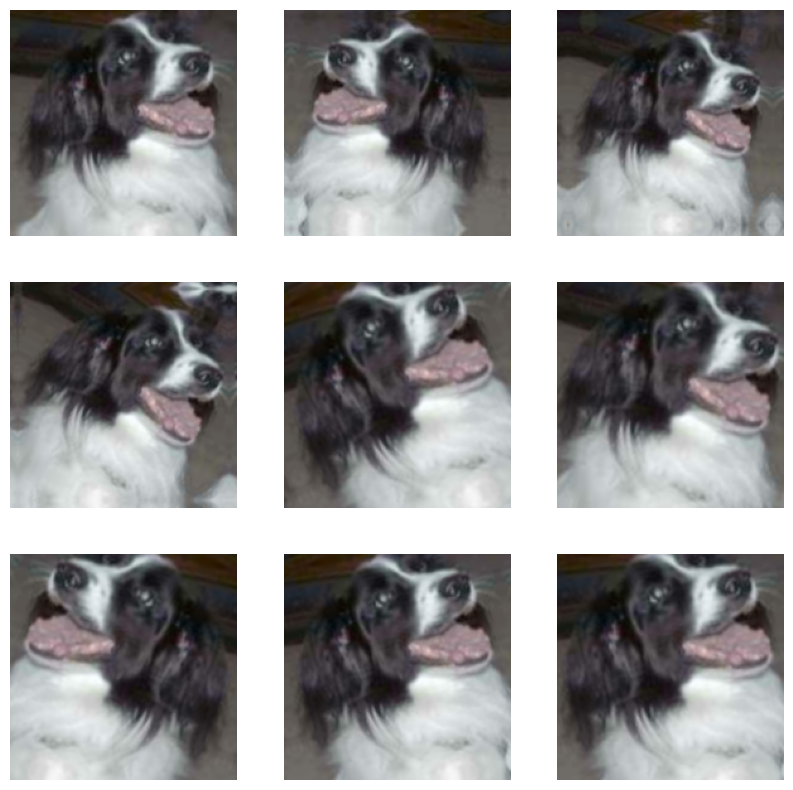

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_agumentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180,180,3)) # 입력층
x = data_agumentation(inputs)
x = layers.Rescaling(1./255)(x) # 이미지[0,1]

# 은닉층
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

x = layers.Dropout(0.5)(x) # 드롭아웃을 적용하면 과대적합이 덜 일어난다.

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 87, 87, 64)        18496     
                                                           

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convent_from_scratch_with_augmentation.keras",
        save_best_only=True,  # 1epoch vs 2epoch
        monitor="val_loss"    # 기준점
    )
]

history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/100
63/63 [==============================] - 8s 87ms/step - loss: 0.6992 - accuracy: 0.5005 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 4s 66ms/step - loss: 0.6951 - accuracy: 0.5220 - val_loss: 0.6848 - val_accuracy: 0.5770
Epoch 3/100
63/63 [==============================] - 4s 67ms/step - loss: 0.6949 - accuracy: 0.5390 - val_loss: 0.6690 - val_accuracy: 0.6020
Epoch 4/100
63/63 [==============================] - 5s 81ms/step - loss: 0.6692 - accuracy: 0.5920 - val_loss: 0.6723 - val_accuracy: 0.5820
Epoch 5/100
63/63 [==============================] - 5s 81ms/step - loss: 0.6646 - accuracy: 0.6030 - val_loss: 0.6448 - val_accuracy: 0.6180
Epoch 6/100
63/63 [==============================] - 4s 66ms/step - loss: 0.6434 - accuracy: 0.6310 - val_loss: 0.6510 - val_accuracy: 0.6110
Epoch 7/100
63/63 [==============================] - 5s 68ms/step - loss: 0.6251 - accuracy: 0.6640 - val_loss: 0.6388 - val_accuracy: 0.6460
Epoch 

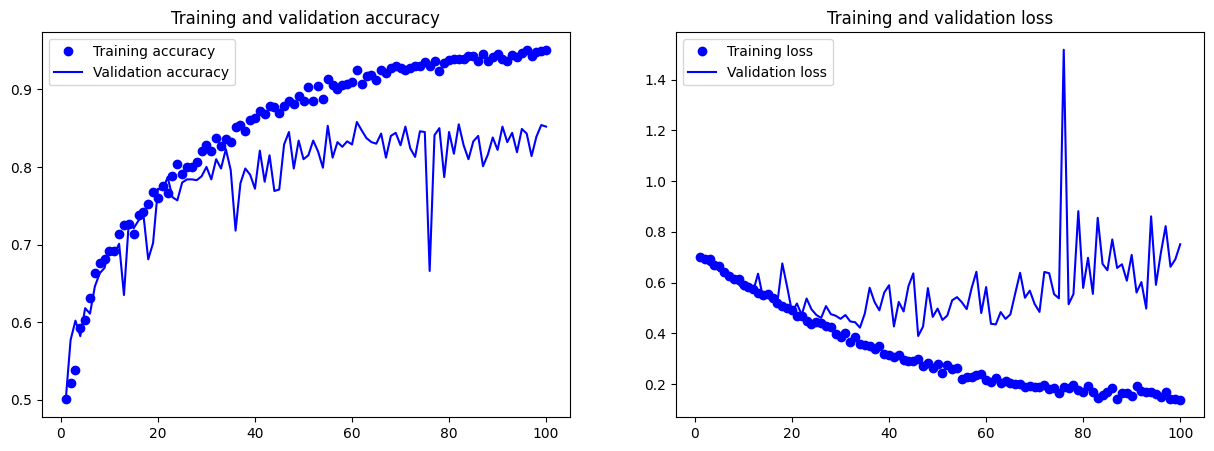

In [ ]:
check_train_val_plot(history)

In [ ]:
test_model = keras.models.load_model("convent_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 3s 34ms/step - loss: 0.6037 - accuracy: 0.6935
테스트 정확도: 0.693


## 사전 훈련된 모델
- 일반 정확도 : 68.8
- 데이터 증식 정확도 : 84.1
- 사전 훈련된 모델 : 97.5
- 모델 미세 조정하기 : 98.5
- 결론 : 딥려닝 프로젝트,
  + 주요 키워드 --> 사전 훈련된 모델 & 모델 미세 조정하기 chatgpt 샘플코드 주세요!!!

## 머신러닝 프로젝트 vs 딥러닝 프로젝트
- 머신러닝 프로젝트의 핵심은 정확도 + 변수 추출 과정 설명 중요 (xgboost, lightGBM 사용)
  + 데이터 분석가 지망생들이 많이함
- 딥러닝 프로젝트의 핵심은 정확도 + 어떤 모델 썻느냐! 모델에 대한 설명 (영어 논문 또는 한글로 번역한 유투브 공부!)
  + 컴공 출신들이 많이 함

## 사전 훈련된 모델 사용
- pretrained model

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

- p.312
- 훈련된 합성곱 기반 층 (동결)
  + vgg16에서 정의된 구조를 그대로 이어받아서 사용하겠다.

- ImageNet 데이터셋에서 훈련했다! --> 대용량 & 다양한 이미지를 학습했다.

In [12]:
# 2014년에 제안된 모델
conv_base = keras.applications.vgg16.VGG16(
    weights = "imagenet",
    include_top = False,# 밀집층을 새로 추가하겠다.
    input_shape=(180,180,3)
)

58889256/58889256 [==============================] - 3s 0us/step


In [13]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

### 특성 추출
- 데이터 증식을 사용하지 않는 특성 추출


In [14]:
# predict() 메서드 호출 넘파이 배열로 특성을 추출
def get_features_and_labels(dataset):
  all_features = [] # 특성
  all_labels = [] # 각 특성에 맞는 label
  for images, labels in dataset:
    predprocesssed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(predprocesssed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)


In [15]:
from tensorflow.keras.utils import image_dataset_from_directory

new_base_dir = pathlib.Path("cats_vs_dogs_small")

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180,180),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180,180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180,180),
    batch_size=32
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [17]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 5s 5s/step


In [18]:
train_features.shape, train_labels.shape

((2000, 5, 5, 512), (2000,))

In [19]:
val_features.shape, val_labels.shape

((1000, 5, 5, 512), (1000,))

In [20]:
test_features.shape, test_labels.shape

((2000, 5, 5, 512), (2000,))

In [21]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

img_path = keras.utils.get_file(
    fname="cat.jpg",
    origin="https://img-datasets.s3.amazonaws.com/cat.jpg")
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
features

1/1 [==============================] - 1s 732ms/step


array([[[[59.097336 ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [42.57251  ,  0.       ,  3.1530602, ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       , 18.166338 , ...,  0.       ,
           0.       ,  9.990433 ],
         ...,
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  4.5960875],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ]],

        [[30.416395 ,  0.       ,  0.       , ...,  0.       ,
           0.       ,  0.       ],
         [ 0.       ,  0.       , 21.97999  , ...,  0.       ,
           0.       ,  0.       ],
         [13.314061 ,  0.       ,  3.0975838, ...,  0.       ,
           0.       ,  0.       ],
         ...,
         [33.98381  ,  0.       ,  0.       , ..., 10.769695 ,
           0.       , 13.

### 출력층 정의하고 재훈련

In [22]:
# 상단에 vgg16 이 있고, 여기 출력층이 5, 5, 512
inputs = keras.Input(shape=(5, 5, 512)) #
x = layers.Flatten()(inputs) # Dense 특성 주입하기 전에 Flatten 층을 사용합니다.
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 4s 50ms/step - loss: 22.3823 - accuracy: 0.9225 - val_loss: 5.0593 - val_accuracy: 0.9620
Epoch 2/20
63/63 [==============================] - 4s 65ms/step - loss: 5.6034 - accuracy: 0.9680 - val_loss: 3.0759 - val_accuracy: 0.9770
Epoch 3/20
63/63 [==============================] - 4s 64ms/step - loss: 1.8014 - accuracy: 0.9890 - val_loss: 4.5329 - val_accuracy: 0.9730
Epoch 4/20
63/63 [==============================] - 3s 44ms/step - loss: 1.1664 - accuracy: 0.9890 - val_loss: 7.3024 - val_accuracy: 0.9670
Epoch 5/20
63/63 [==============================] - 3s 51ms/step - loss: 1.1558 - accuracy: 0.9915 - val_loss: 6.5023 - val_accuracy: 0.9690
Epoch 6/20
63/63 [==============================] - 4s 58ms/step - loss: 0.8159 - accuracy: 0.9945 - val_loss: 5.9539 - val_accuracy: 0.9710
Epoch 7/20
63/63 [==============================] - 3s 50ms/step - loss: 0.7901 - accuracy: 0.9940 - val_loss: 9.2081 - val_accuracy: 0.9620
Epoch 8/20
6

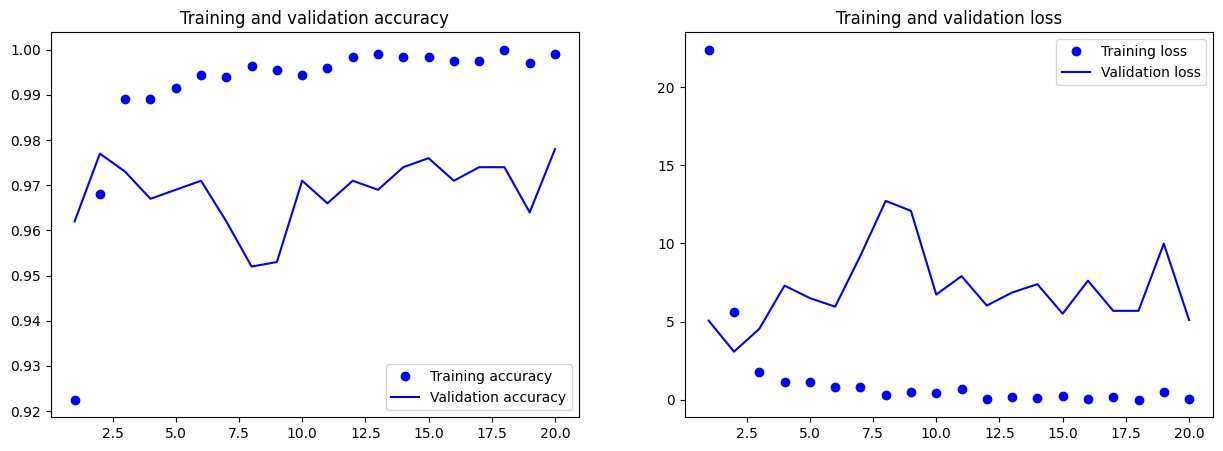

In [23]:
check_train_val_plot(history)

In [ ]:
# 2014년에 제안된 모델
conv_base = keras.applications.vgg16.VGG16(
    weights = "imagenet",
    include_top = False,# 밀집층을 새로 추가하겠다.
    input_shape=(180,180,3)
)

In [27]:
conv_base = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    input_shape=(180,180,3)
)

219055592/219055592 [==============================] - 9s 0us/step


In [28]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 89, 89, 32)   864         ['input_4[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 89, 89, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                

In [30]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

model = InceptionResNetV2(weights='imagenet', include_top=False)

img_path = keras.utils.get_file(
    fname="cat.jpg",
    origin="https://img-datasets.s3.amazonaws.com/cat.jpg")
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
features

1/1 [==============================] - 6s 6s/step


array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.10288619],
         [0.        , 0.        , 0.3626281 , ..., 0.        ,
          0.        , 0.        ],
         [0.11625648, 0.        , 0.19645289, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.05527357, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.33489752, 0.        , 0.1114556 , ..., 0.        ,
          0.        , 0.        ],
         [1.1053452 , 0.        , 0.38731727, ..., 0.        ,
          0.06788055, 0.25091684],
         [1.129805  , 0.17371082, 0.45185164, ..., 0.0263265 ,
          0.        , 0.12042987],
         [0.87299997, 0.        , 0.        , ..., 0.47306365,
          0.16141257, 0.12837443]],

        [[0.    

In [32]:
from tensorflow.keras.utils import image_dataset_from_directory

new_base_dir = pathlib.Path("cats_vs_dogs_small")

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180,180),
    batch_size=32
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180,180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [33]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 6s 6s/step


In [34]:
inputs = keras.Input(shape=(4, 4, 1536)) #
x = layers.Flatten()(inputs) # Dense 특성 주입하기 전에 Flatten 층을 사용합니다.
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 9s 114ms/step - loss: 6597.7007 - accuracy: 0.4860 - val_loss: 3074.0669 - val_accuracy: 0.5020
Epoch 2/20
63/63 [==============================] - 6s 89ms/step - loss: 4410.2124 - accuracy: 0.4900 - val_loss: 2204.1223 - val_accuracy: 0.5030
Epoch 3/20
63/63 [==============================] - 7s 109ms/step - loss: 2861.5879 - accuracy: 0.5270 - val_loss: 1924.2672 - val_accuracy: 0.5000
Epoch 4/20
63/63 [==============================] - 6s 90ms/step - loss: 1925.4995 - accuracy: 0.5355 - val_loss: 1241.8251 - val_accuracy: 0.4930
Epoch 5/20
63/63 [==============================] - 7s 107ms/step - loss: 1178.1062 - accuracy: 0.5215 - val_loss: 481.2640 - val_accuracy: 0.5220
Epoch 6/20
63/63 [==============================] - 5s 87ms/step - loss: 546.7241 - accuracy: 0.5240 - val_loss: 508.1941 - val_accuracy: 0.5000
Epoch 7/20
63/63 [==============================] - 7s 115ms/step - loss: 196.1179 - accuracy: 0.5125 - val_loss: 82.4

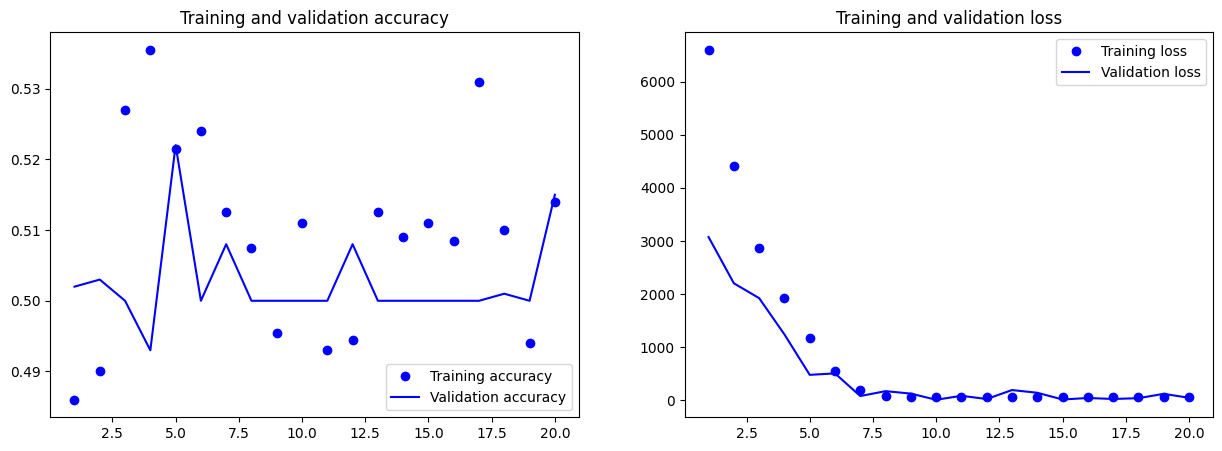

In [35]:
check_train_val_plot(history)

In [36]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = True
print(conv_base.trainable_weights) # 동결 전

[<tf.Variable 'block1_conv1/kernel:0' shape=(3, 3, 3, 64) dtype=float32, numpy=
array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
          -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
         [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
          -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
         [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
          -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],

        [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
          -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
         [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
          -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
         [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
          -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],

        [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
          -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
         [-8.1387035

In [38]:
conv_base.trainable = False
print(conv_base.trainable_weights) # 동결 후

[]


- 데이터 증식
- 동결된 합성곱 기반층
- 밀집분류

In [42]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# 모델 구성
inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

# 모델 컴파일
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [43]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 1342s 21s/step - loss: 17.6736 - accuracy: 0.9030 - val_loss: 3.1236 - val_accuracy: 0.9700
Epoch 2/10
63/63 [==============================] - 1258s 20s/step - loss: 8.1632 - accuracy: 0.9400 - val_loss: 3.5499 - val_accuracy: 0.9750
Epoch 3/10
63/63 [==============================] - 1267s 20s/step - loss: 5.5500 - accuracy: 0.9605 - val_loss: 5.8571 - val_accuracy: 0.9650
Epoch 4/10
63/63 [==============================] - 1260s 20s/step - loss: 5.7188 - accuracy: 0.9545 - val_loss: 3.7723 - val_accuracy: 0.9720
Epoch 5/10
63/63 [==============================] - 1267s 20s/step - loss: 3.9484 - accuracy: 0.9710 - val_loss: 2.6008 - val_accuracy: 0.9770
Epoch 6/10
63/63 [==============================] - 1269s 20s/step - loss: 3.8041 - accuracy: 0.9645 - val_loss: 3.0429 - val_accuracy: 0.9820
Epoch 7/10
63/63 [==============================] - 1270s 20s/step - loss: 3.3662 - accuracy: 0.9690 - val_loss: 3.9350 - val_accuracy: 0.978

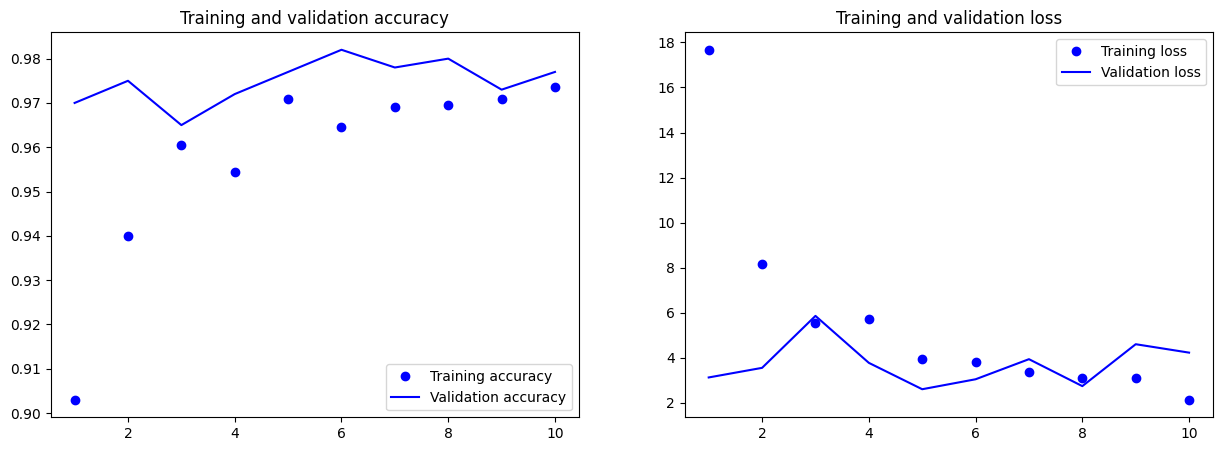

In [44]:
check_train_val_plot(history)

In [47]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras"
)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도:{test_acc:.3f}")

63/63 [==============================] - 795s 13s/step - loss: 3.3008 - accuracy: 0.9770
테스트 정확도:0.977


- 마지막 3개의 합성곱 층 미세조정

In [48]:
conv_base.trainable = True # 동결 전
for layer in conv_base.layers[:-4]:
  layer.trainable= False # 동결 처음부터~ block4_pool 동결

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5), # 미세조정시 학습수치를 낮춘다.
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

check_train_val_plot(history)

Epoch 1/10
63/63 [==============================] - 1401s 22s/step - loss: 1.7696 - accuracy: 0.9800 - val_loss: 3.6302 - val_accuracy: 0.9760
Epoch 2/10
63/63 [==============================] - 1404s 22s/step - loss: 0.8527 - accuracy: 0.9870 - val_loss: 3.4091 - val_accuracy: 0.9720
Epoch 3/10
63/63 [==============================] - 1381s 22s/step - loss: 0.9301 - accuracy: 0.9870 - val_loss: 3.0976 - val_accuracy: 0.9780
Epoch 4/10
63/63 [==============================] - 1391s 22s/step - loss: 0.9092 - accuracy: 0.9840 - val_loss: 3.7073 - val_accuracy: 0.9740
Epoch 5/10
63/63 [==============================] - 1383s 22s/step - loss: 0.7330 - accuracy: 0.9855 - val_loss: 3.5128 - val_accuracy: 0.9760
Epoch 6/10
63/63 [==============================] - 1357s 22s/step - loss: 0.5092 - accuracy: 0.9895 - val_loss: 3.2135 - val_accuracy: 0.9760
Epoch 7/10
63/63 [==============================] - 1397s 22s/step - loss: 0.4195 - accuracy: 0.9905 - val_loss: 2.4436 - val_accuracy: 0.9800

In [ ]:
test_model = keras.models.lead_model(
    "fine_tuning.keras"
)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도:{test_acc:.3f}")

## 잔차 연결
- 교재 p. 344


In [ ]:
# 필터 개수가 변경되는 잔차 블록
from tesorflow import keras
from tensorflow.keras import layers

inputs = keras.input(shape=(32,32,3))
x = layers.Conv2D(32,3, activation="relu")(inputs)
# 잔차 연결 해주는 코드
residual = x # 잔차를 별도로 저장

x = layers.Conv2D(64,3, activation = "relu", padding="same")(x) # 다운 샘플링 안되도록 적용
residual = layers.Conv2D(64,1)(residual)
x = layers.add([x,residual])

- 최대 풀링 층을 가진 잔차 블록

In [ ]:
inputs = keras.input(shape=(32,32,3))
x = layers.Conv2D(32,3, activation="relu")(inputs)
# 잔차 연결 해주는 코드
residual = x # 잔차를 별도로 저장

x = layers.Conv2D(64,3, activation = "relu", padding="same")(x) # 다운 샘플링 안되도록 적용
x = layers.MaxPooling2D(2, padding= "same")(x)
residual = layers.Conv2D(64,1)(residual)
x = layers.add([x,residual])

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Rescaling(1./255)(inputs)

def residual_block(x, filters, pooling=False):
    residual = x
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(filters, 3, activation="relu", padding="same")(x)
    if pooling:
        x = layers.MaxPooling2D(2, padding="same")(x)
        residual = layers.Conv2D(filters, 1, strides=2)(residual)
    elif filters != residual.shape[-1]:
        residual = layers.Conv2D(filters, 1)(residual)
    x = layers.add([x, residual])
    return x

x = residual_block(x, filters=32, pooling=True)
x = residual_block(x, filters=64, pooling=True)
x = residual_block(x, filters=128, pooling=False)

x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()